In [3]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import pyarrow
from datetime import datetime
import simulations, utilities
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.cm as cm
from matplotlib import rcParams
import itertools
pv=!{sys.executable} --version
print(pv[0],'numpy ==', np.__version__, 'pyarrow ==',pyarrow.__version__, 'seaborn == ', sns.__version__)

Python 3.9.7 numpy == 1.20.3 pyarrow == 7.0.0 seaborn ==  0.11.2


In [4]:
# options
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
mpl.rcParams['figure.dpi'] = 300
sns.set_style("ticks")
sns.set_palette("cubehelix")
font_scale = 3
sns.set_context("paper", font_scale=font_scale, rc={"lines.linewidth": 2, 'aspect':1})
# figure size in inches
#rcParams['figure.figsize'] = 11.7,8.27


In [13]:
def plot_agg(df, ci=None, concise=True, title = None, legend=True, hue=None, x = 'Knowledge Gini',  
              ys=[ 'Log Market Cap', 'Economic Gini',  ],  
             style=None, col='A'):
    n = len(ys)
    for i in range(n):
        ax=sns.relplot(aspect=1.5, kind="line", x=x, y=ys[i], col = col, style=style, hue=hue, ci=ci, data=df, legend=legend);#, ax=axs[i]);  

In [14]:
data = pd.read_parquet('simulations.SimulationNK_main_agg.parquet')
print(data.shape)
print(data.columns)
data.head()

(4200, 22)
Index(['Configuration', 'Run', 'A', 'K', 'N', 'Companies', 'Economic Gini',
       'Economic Median', 'Economic Q1', 'Economic Q3', 'Exploration Effort',
       'Exploration Norms', 'Initial Economic Stock', 'Knowledge Gini',
       'Knowledge Median', 'Knowledge Q1', 'Knowledge Q3', 'Market Capital',
       'Seed', 'Simulation Size', 'Simulation Time', 'Time Step'],
      dtype='object')


Configuration  Run     A  K  N  Companies  Economic Gini  Economic Median  \
0              0    0 0.600  1  2        100          0.914            0.000   
1              0    1 0.600  1  2        100          0.946            0.000   
2              0    2 0.600  1  2        100          0.845            0.000   
3              0    3 0.600  1  2        100          0.861            0.000   
4              0    4 0.600  1  2        100          0.990            0.000   

   Economic Q1  Economic Q3  Exploration Effort  Exploration Norms  \
0        0.000        0.000                  10              0.100   
1        0.000        0.000                  10              0.100   
2        0.000        3.000                  10              0.100   
3        0.000        1.750                  10              0.100   
4        0.000        0.000                  10              0.100   

   Initial Economic Stock  Knowledge Gini  Knowledge Median  Knowledge Q1  \
0                     100           0.235             0.494         0.281   
1                     100           0.253             0.295         0.239   
2                     100           0.244             0.518         0.233   
3                     100           0.153             0.505         0.399   
4                     100           0.514             0.039         0.039   

   Knowledge Q3  Market Capital  Seed  Simulation Size  Simulation Time  \
0         0.494           29284     0              100               50   
1         0.611             946     1              100               50   
2         0.671             361     2              100               50   
3         0.813           55122     3              100               50   
4         0.540               0     4              100               50   

   Time Step  
0         50  
1         50  
2         50  
3         50  
4         50

In [15]:
data['Log Market Cap'] = np.log(1+data['Market Capital'])

In [16]:
data1 = data[data['K']==1]
data2 = data[data['K']==3]
data3 = data[data['K']==6]

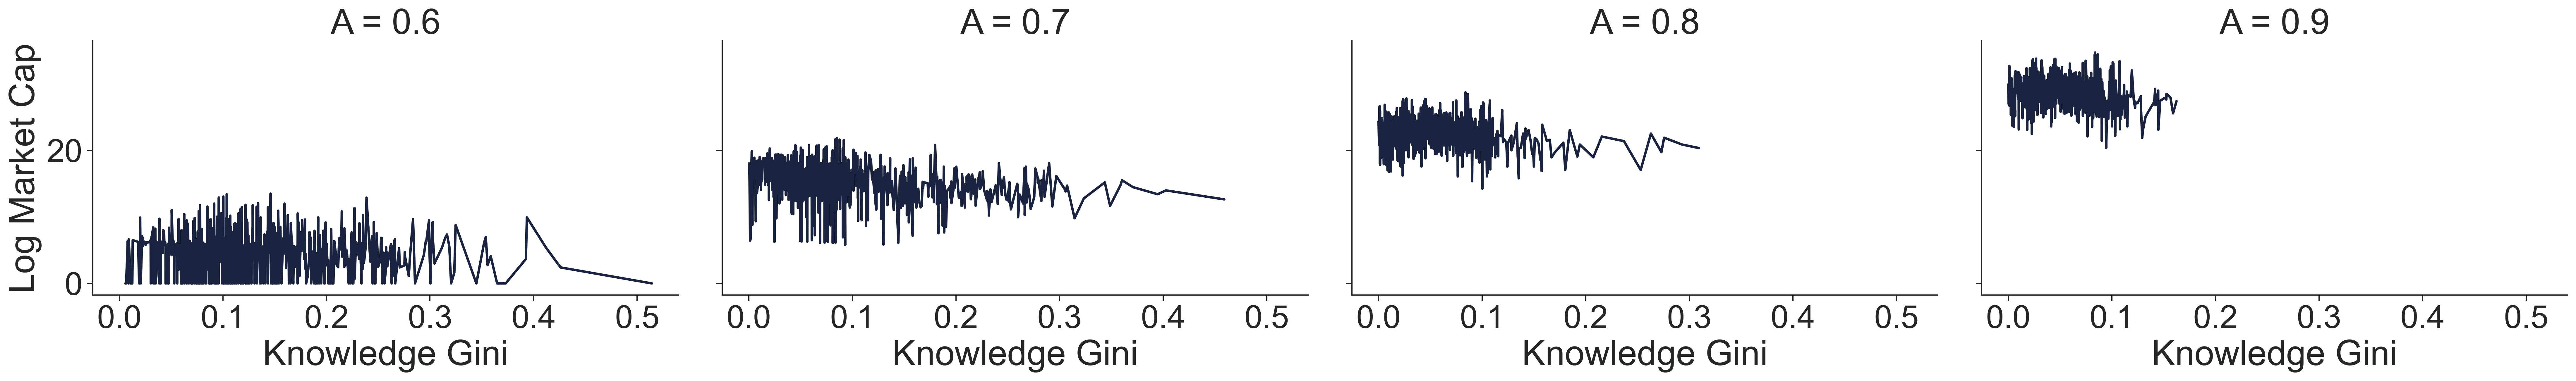

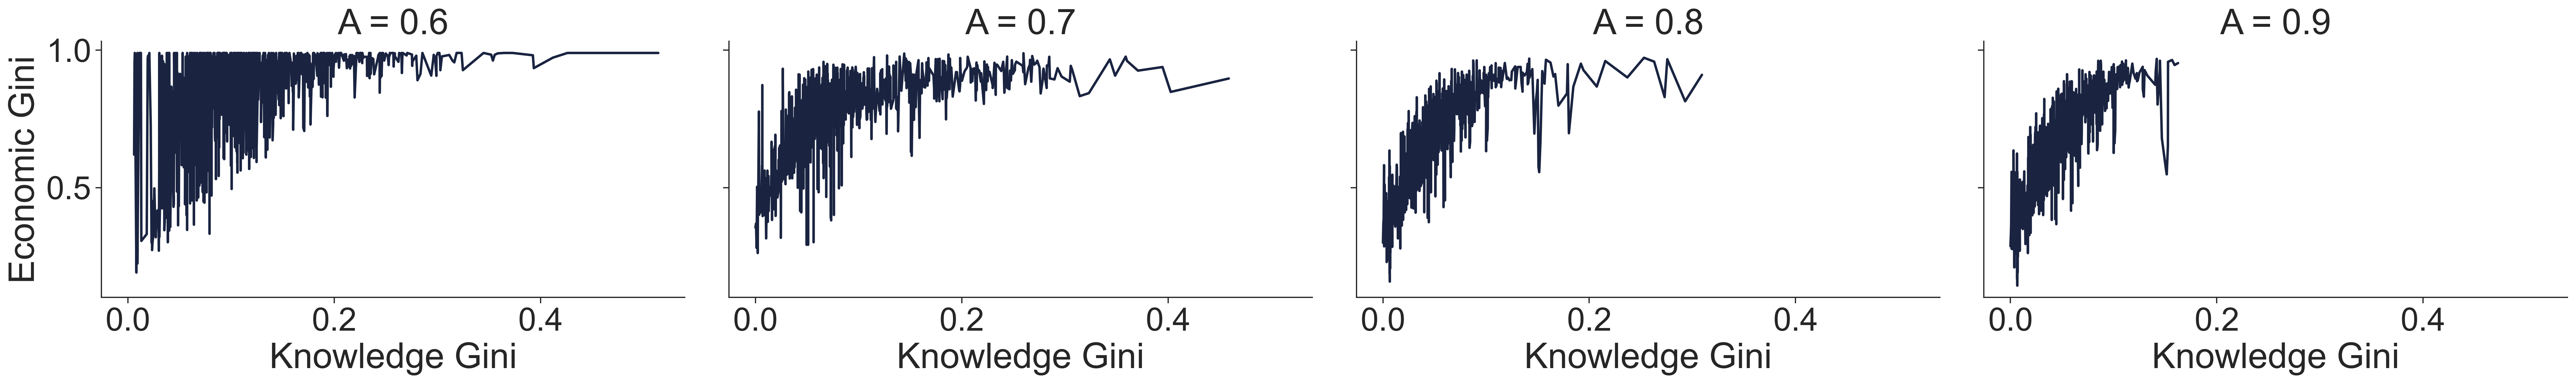

In [17]:
plot_agg(data)

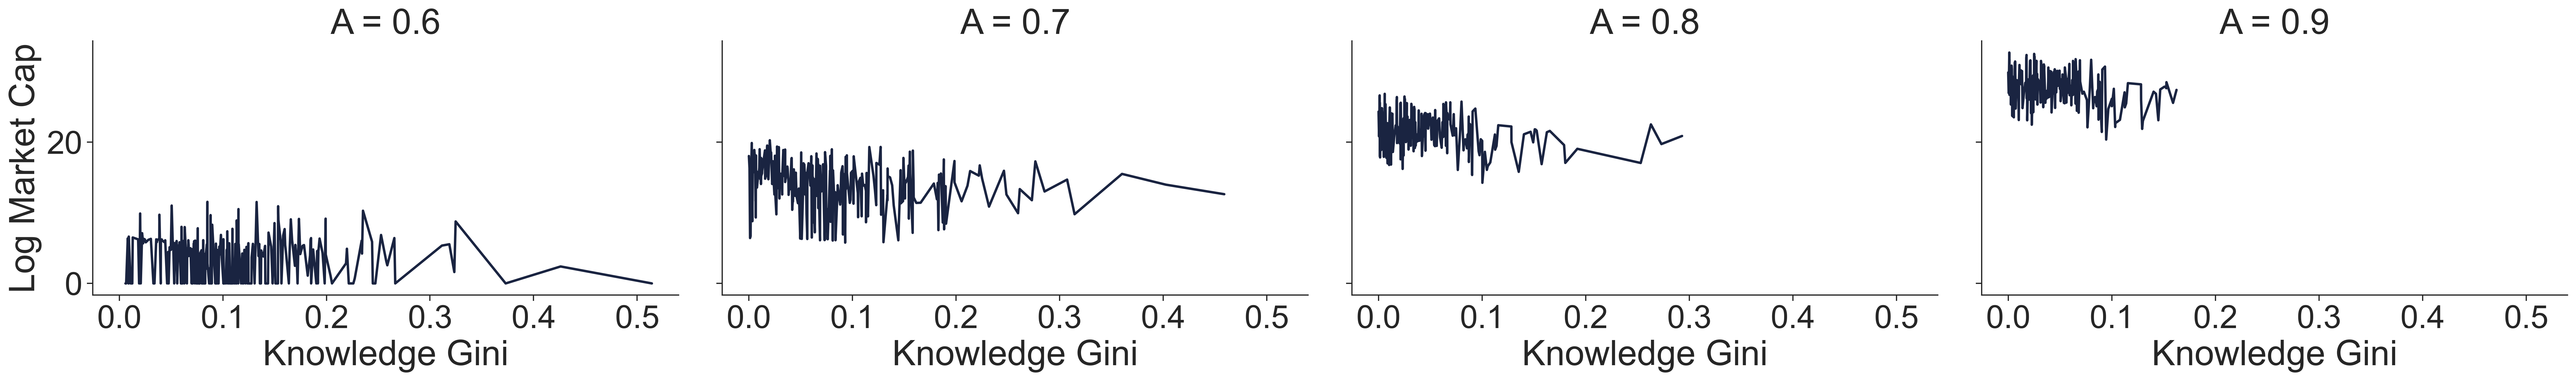

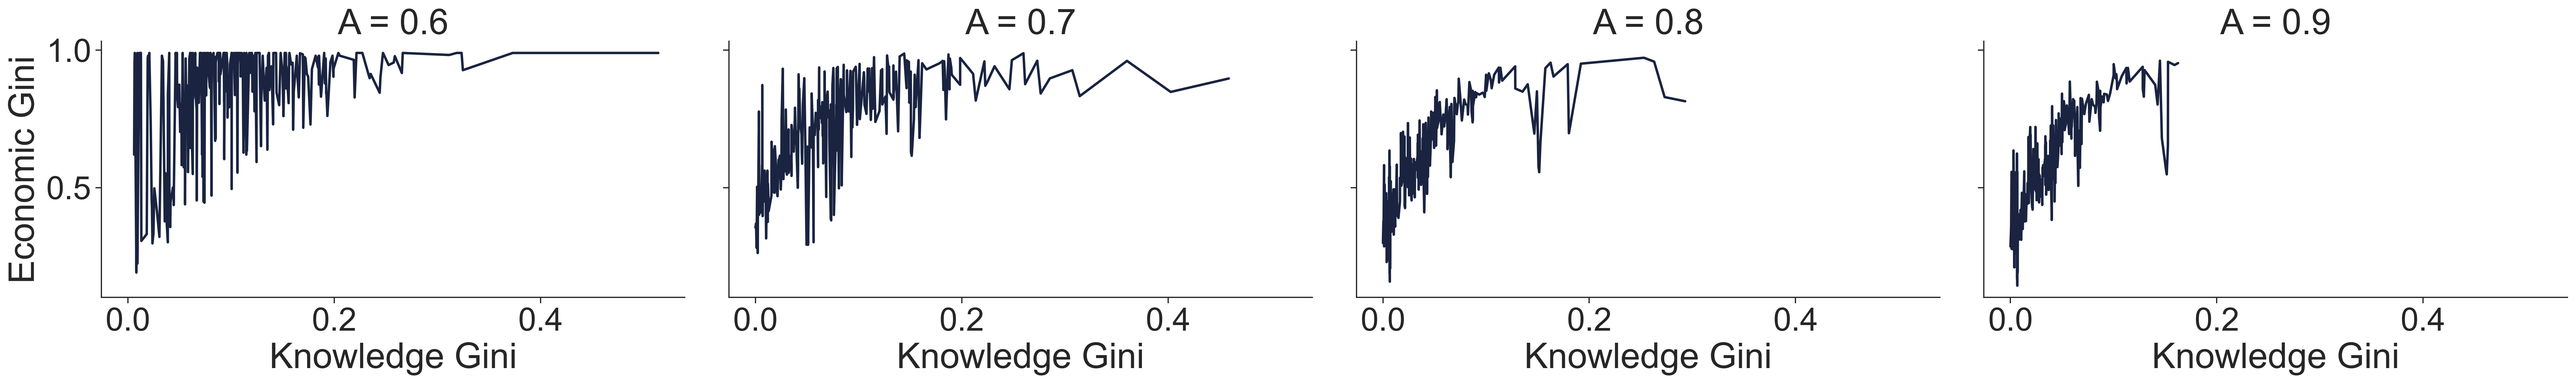

In [18]:
plot_agg(data1)

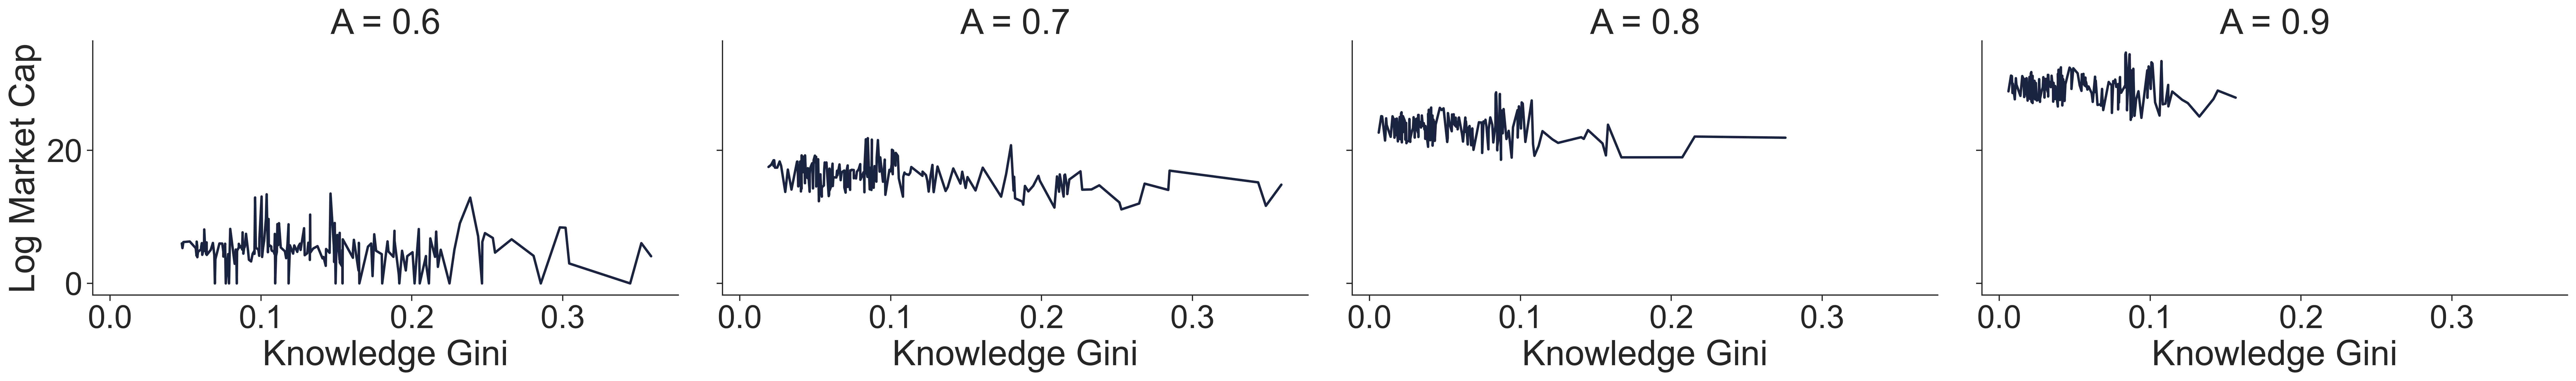

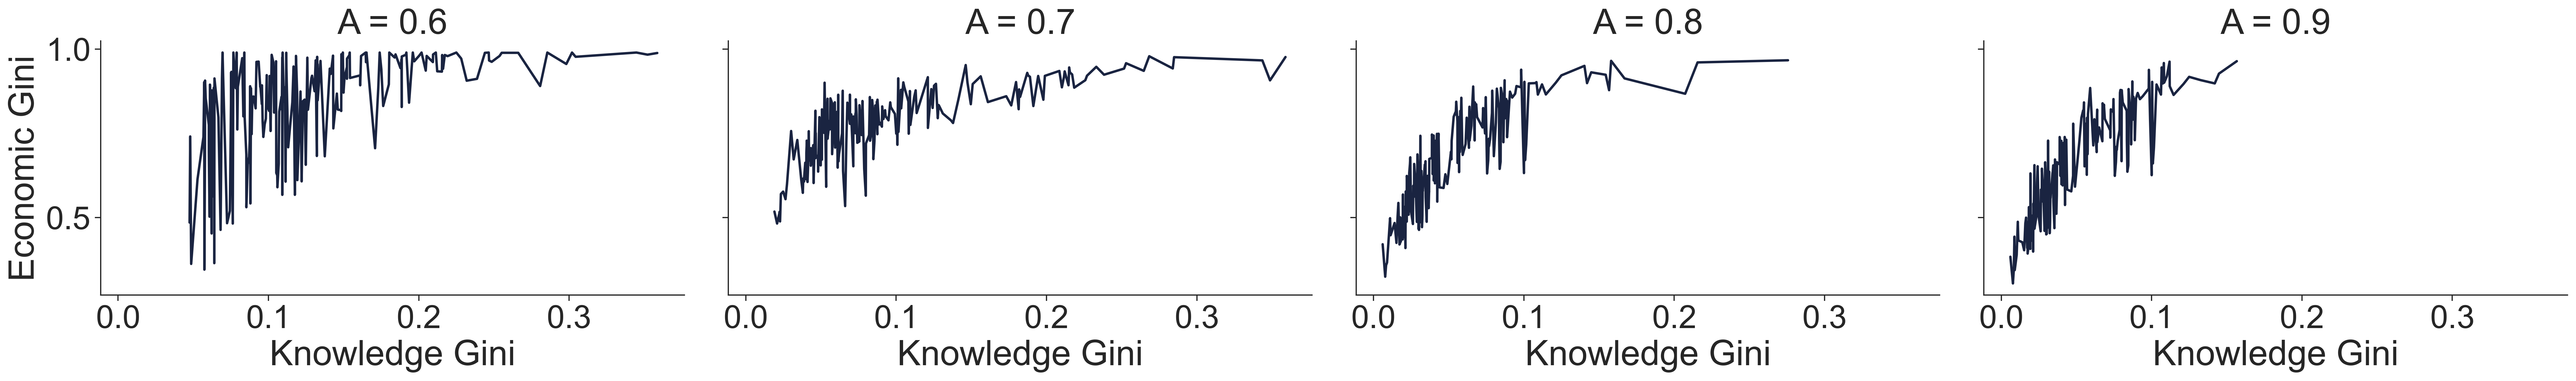

In [19]:
plot_agg(data2)

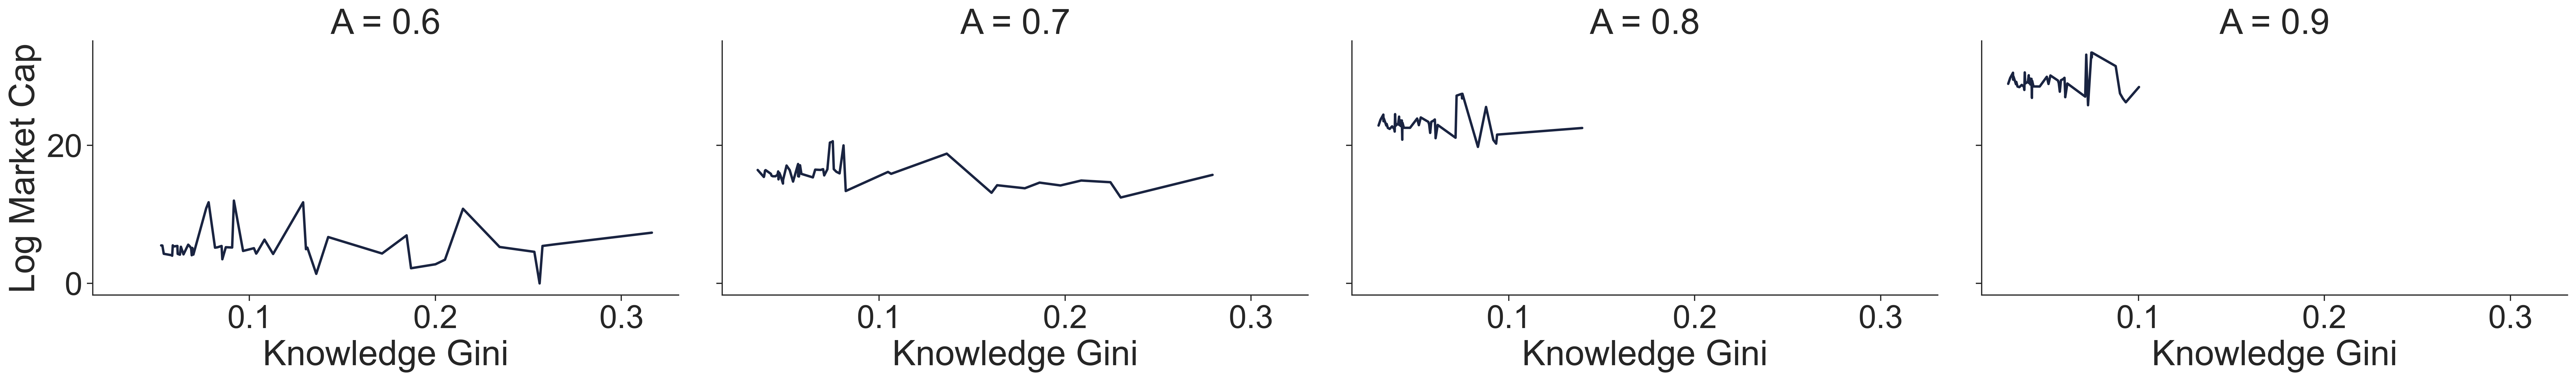

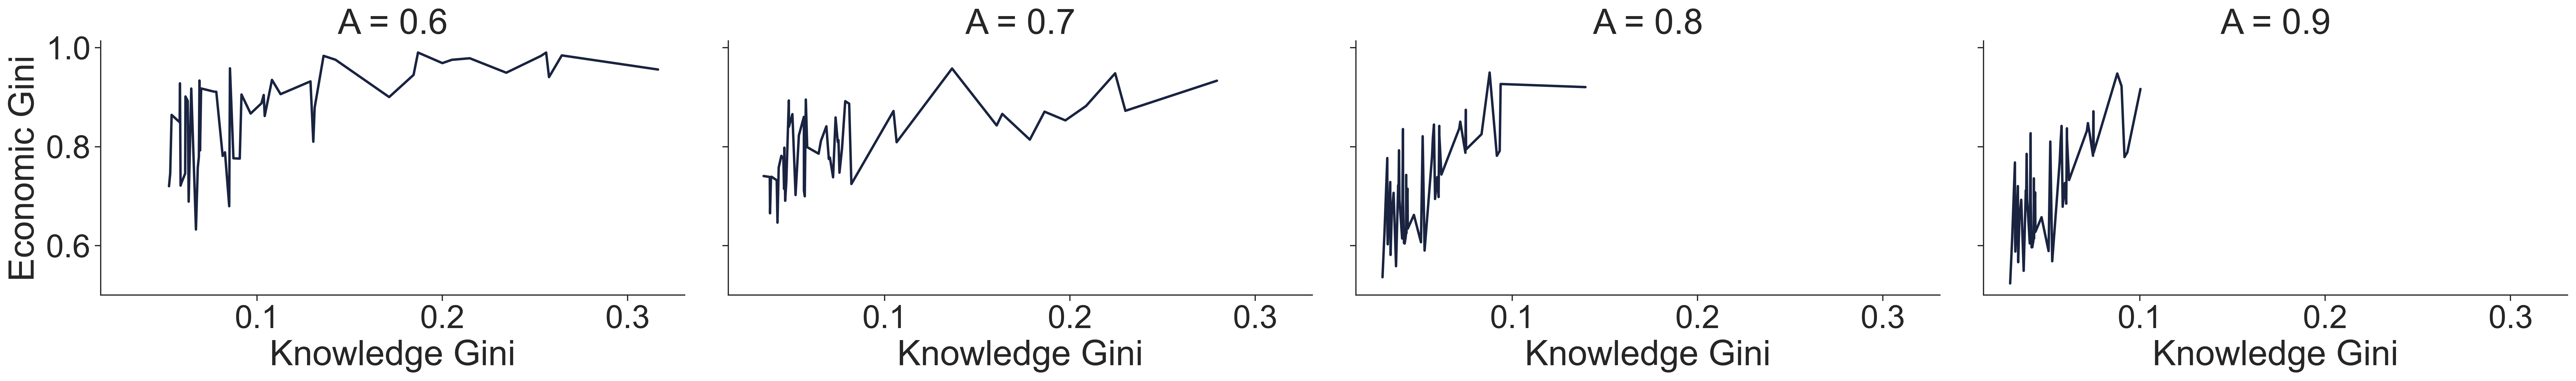

In [20]:
plot_agg(data3)

In [30]:
data.dtypes

A                         float64
K                           int64
N                           int64
Companies                   int64
Configuration               int64
Economic Gini             float64
Economic Median           float64
Economic Q1               float64
Economic Q3               float64
Exploration Effort          int64
Exploration Norms         float64
Initial Economic Stock      int64
Knowledge Gini            float64
Knowledge Median          float64
Knowledge Q1              float64
Knowledge Q3              float64
Run                         int64
Seed                        int64
Simulation Size             int64
Simulation Time             int64
Time Step                   int64
dtype: object